# BONUS ANALYSIS

In [1]:
#import dependencies
# Pandas
import pandas as pd
# MatPlotLib/NumPy/SciPy
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [3]:
engine = create_engine('postgresql://postgres:Employees_db')

In [4]:
connection = engine.connect()

In [5]:
# import from SQL
employees_data = pd.read_sql("SELECT * FROM Employees", connection)
employees_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [6]:
#import from SQL
salary_data = pd.read_sql("SELECT * FROM Salaries", connection)
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
# import from SQL
title_data = pd.read_sql("SELECT * FROM Titles", connection)
title_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


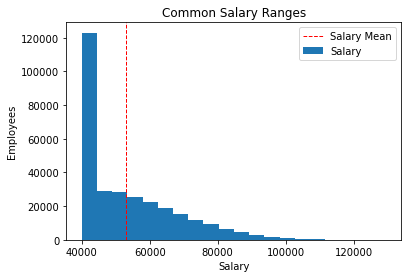

In [8]:
# Create a histogram to visualize the most common salary ranges for employees
plt.hist(salary_data['salary'], 20, density=False, label="Salary")
plt.axvline(salary_data['salary'].mean(), color='red', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")
plt.show()

In [9]:
# Create a bar chart of average salary by title
# Define the query
query1 = pd.read_sql("SELECT * FROM Salaries INNER JOIN employees ON Salaries.emp_no = employees.emp_no", connection)
query1

# query_into_pandas
# Store the query
#salaries1 = query1.groupby(["salary","emp_no"]).mean()["salary"]

# # Plot the Barchart
# title_list = avg_salaries_by_title.index
# avg_salary_for_title = avg_salaries_by_title.values

# x_axis = np.arange(len(title_list))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, title_list, rotation=90)
# plt.title("Average Salary By Title")
# plt.xlabel("Title")
# plt.ylabel("Average Salary ($)")
# plt.grid(axis="y")
# chart = plt.bar(x_axis, avg_salary_for_title, color="b", alpha=0.5, align="center")

# for i in chart:
#     yvalue = i.get_height()
#     plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
# plt.show()

,emp_no,salary,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,57444,48973,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
1,13616,40000,13616,e0003,1961-08-30,Perry,Lorho,F,1991-08-03
2,240129,43548,240129,e0004,1952-08-11,Roddy,Karnin,M,1985-05-29
3,427958,63377,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11
4,35916,40000,35916,e0003,1953-08-15,Wonhee,Talmon,F,1985-03-20
...,...,...,...,...,...,...,...,...,...
300019,222402,40000,222402,s0001,1955-03-03,Jaana,Klyachko,F,1991-01-11
300020,70921,40000,70921,e0004,1957-08-30,Martijn,Bernardeschi,F,1991-04-28
300021,275129,59703,275129,e0003,1958-07-25,Fay,Perz,M,1988-12-19
300022,202478,48038,202478,e0003,1956-11-16,Xiaoheng,Michaels,M,1991-07-27


In [10]:
# salaries1 = query1.groupby(["salary","emp_title","birth_date","first_name","last_name",
#                            "sex","hire_date"]).mean()["salary"]
